<a href="https://colab.research.google.com/github/vwcmorais/notebooks/blob/master/clustering_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Clustering Algorithms**: K-Means

In [12]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

<ipython-input-2-8a61c98a9f51>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=20, cmap='summer');


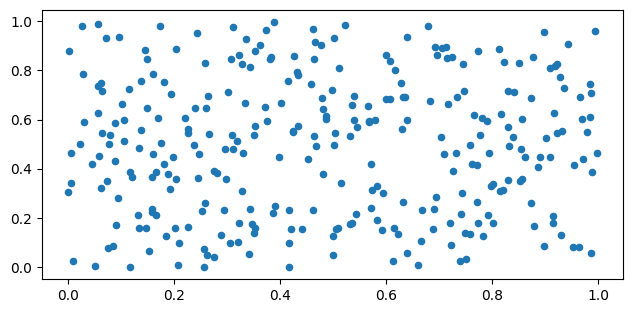

In [2]:
# Generate Data
X = np.random.rand(300,2)

plt.figure(figsize=(7.5, 3.5))
plt.scatter(X[:, 0], X[:, 1], s=20, cmap='summer');
plt.show()

In [4]:
# Initialize K-Means
kmeans = KMeans(n_clusters=3, max_iter=100)

In [7]:
# Step 4 − Train the Model
model = kmeans.fit(X)

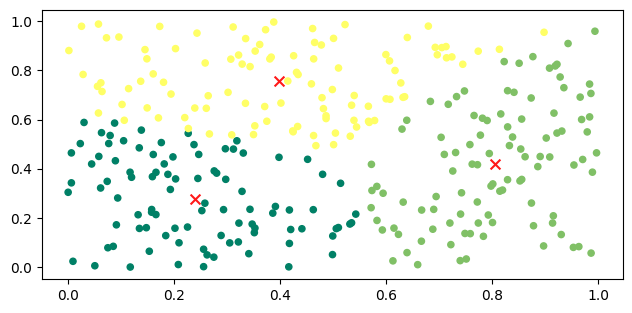

In [8]:
# Step 5 − Visualize the Clusters
plt.figure(figsize=(7.5, 3.5))
plt.scatter(X[:,0], X[:,1], c=model.labels_, s=20, cmap='summer')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],
marker='x', c='r', s=50, alpha=0.9)
plt.show()

In [9]:
# A coesão pode ser acessada através de inertia_
coesao = model.inertia_

print("A coesão (WCSS) dos clusters é:", coesao)

A coesão (WCSS) dos clusters é: 18.401894847973207


In [10]:
# Calcular o centroide global
centroide_global = np.mean(X, axis=0)

# Calcular a separação
separacao = np.sum([np.linalg.norm(centroide - centroide_global) ** 2 for centroide in kmeans.cluster_centers_])

print("A separação dos clusters é:", separacao)

A separação dos clusters é: 0.29178227632981885


In [14]:
# o Silhouette Score fornece uma medida compreensiva que leva em conta tanto a coesão quanto a separação dos clusters.
# Chamando a coesão de a e separação de b o Silhouette Score para um único ponto é obtido pela fórmula s = (b-a)/(max(a,b)) .
labels = kmeans.labels_

# Calculando o Silhouette Score
score = silhouette_score(X, labels)
print("O Silhouette Score é:", score)

O Silhouette Score é: 0.37822333949738596


### **Clustering Algorithms**: K-Medoids Clustering

In [16]:
!pip install scikit-learn-extra
# installs the missing module
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.4 MB/s eta 0:00:00


In [17]:
# Generate sample data
X, y = make_blobs(n_samples=500, centers=3, random_state=42)

In [18]:
# Cluster the data using KMedoids
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(X)

KMedoids(n_clusters=3, random_state=42)

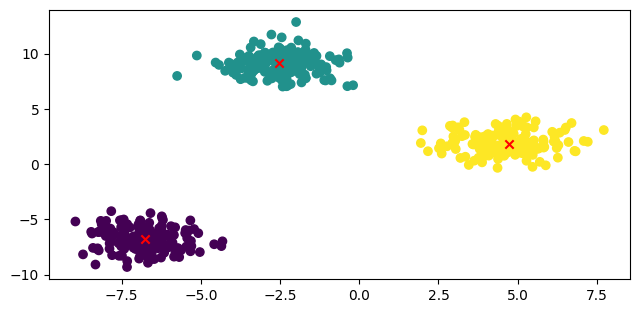

In [19]:
# Plot the results
plt.figure(figsize=(7.5, 3.5))
plt.scatter(X[:, 0], X[:, 1], c=kmedoids.labels_, cmap='viridis')
plt.scatter(kmedoids.cluster_centers_[:, 0],
kmedoids.cluster_centers_[:, 1], marker='x', color='red')
plt.show()

In [20]:
# o Silhouette Score fornece uma medida compreensiva que leva em conta tanto a coesão quanto a separação dos clusters.
# Chamando a coesão de a e separação de b o Silhouette Score para um único ponto é obtido pela fórmula s = (b-a)/(max(a,b)) .
labels = kmedoids.labels_

# Calculando o Silhouette Score
score = silhouette_score(X, labels)
print("O Silhouette Score é:", score)

O Silhouette Score é: 0.8437565906781406


In [22]:
# Calcular o centroide global
centroide_global = np.mean(X, axis=0)

# Calcular a separação
separacao = np.sum([np.linalg.norm(centroide - centroide_global) ** 2 for centroide in kmedoids.cluster_centers_])

print("A separação dos clusters é:", separacao)

A separação dos clusters é: 193.6048084338301


In [23]:
# A coesão pode ser acessada através de inertia_
coesao = model.inertia_

print("A coesão (WCSS) dos clusters é:", coesao)

A coesão (WCSS) dos clusters é: 18.401894847973207


### **Clustering Algorithms**: Mean-Shift Clustering

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

In [25]:
# Generate the data
X = np.random.randn(500,2)

In [26]:
# Estimate the bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=100)

In [27]:
# Initialize the Mean-Shift algorithm
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

In [30]:
# Train the model
ms.fit(X)

MeanShift(bandwidth=0.6843050017889972, bin_seeding=True)

Number of estimated clusters: 9


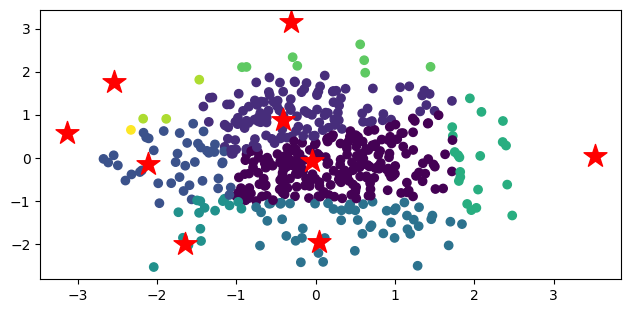

In [31]:
# Visualize the results
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

# Plot the data points and the centroids
plt.figure(figsize=(7.5, 3.5))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='*', s=300, c='r')
plt.show()

### Hierarchical Clustering

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

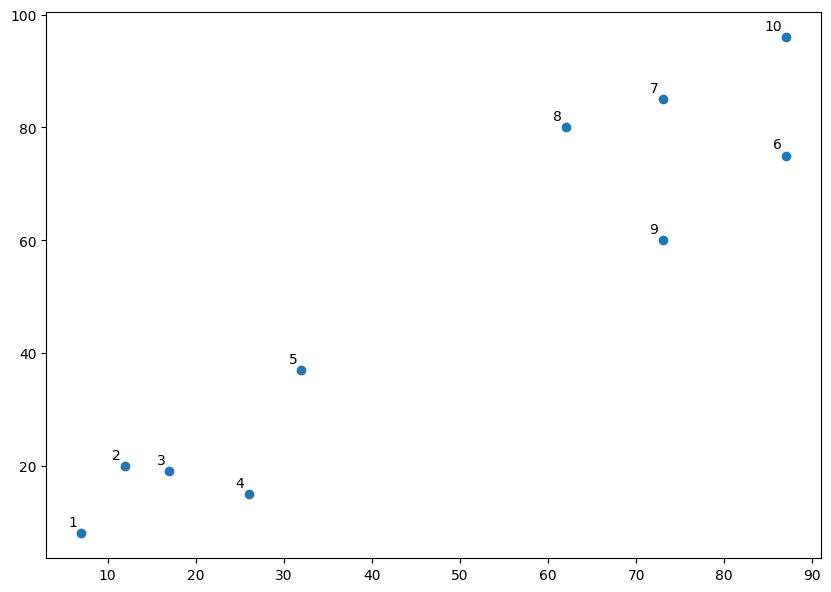

In [33]:
X = np.array([[7,8],[12,20],[17,19],[26,15],[32,37],[87,75],[73,85],
[62,80],[73,60],[87,96],])
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
   plt.annotate(label,xy=(x, y), xytext=(-3, 3),textcoords='offset points', ha='right', va='bottom')
plt.show()

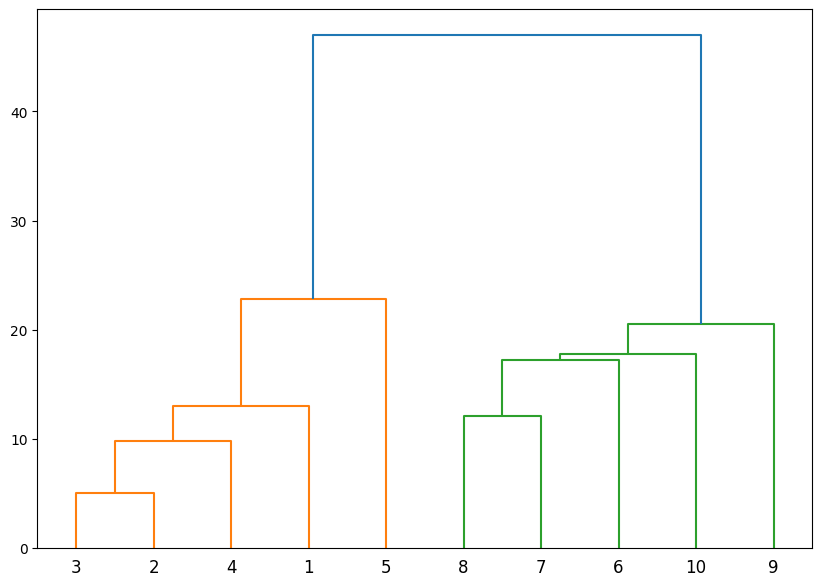

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize=(10, 7))

dendrogram(linked, orientation='top',labels=labelList,
distance_sort='descending',show_leaf_counts=True)

plt.show()

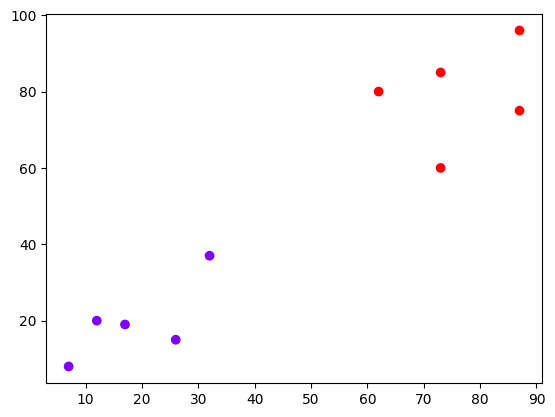

In [38]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2,linkage='ward')

cluster.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

## DBSCAN Clustering

In [40]:
# Load the dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [41]:
# Perform DBSCAN clustering
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.2, min_samples=5)
clustering.fit(X)

DBSCAN(eps=0.2)

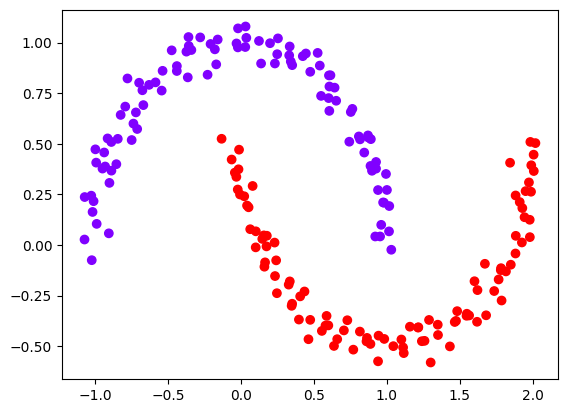

In [42]:
# Visualize the results
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='rainbow')
plt.show()

## OPTICS Clustering
- OPTICS is like DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

- OPTICS has several advantages over DBSCAN:
**  Ability to handle clusters of varying densities − OPTICS can handle clusters that have varying densities, unlike some other clustering algorithms that require clusters to have uniform densities.
** Ability to handle noise − OPTICS can identify noise data points that do not belong to any cluster, which is useful for removing outliers from the dataset.
** Hierarchical clustering structure − OPTICS produces a hierarchical clustering structure that can be useful for analyzing the dataset at different levels of granularity.

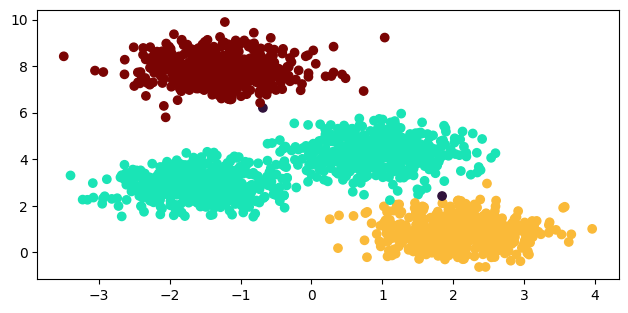

In [43]:
from sklearn.cluster import OPTICS
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_blobs(n_samples=2000, centers=4, cluster_std=0.60, random_state=0)

# Cluster the data using OPTICS
optics = OPTICS(min_samples=50, xi=.05)
optics.fit(X)

# Plot the results
labels = optics.labels_
plt.figure(figsize=(7.5, 3.5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='turbo')
plt.show()